# Clustering: 

- Refers to collection of similar on related objects into the same group

## Notes

### Types
- **Fuzzy clustering:** Each object belongs to each cluster with some weight (weight can be zero)
- **Non-fuzzy. clustering:** Each object belongs to only one cluster

### Clustering methods

#### Partiton clustering
- Creating a fixed number of clusters
    - **Strength**
        - Works well with clusters with spherical shape
    - **Weakness**
        - Not well suited for clusters with complicated shapes and different sizes
        - Breaks down when used with clusters of different density

#### Hierarchical clustering
- Creates clusters by building either a top-down or bottom-top  hierarchy
    - **Types:**
        - Agglomerative (Bottom-up): Merges two points that are most similar until all points have been merged into a single cluster
        - Divisive (top-down): It starts with all points as one cluster and splits the least similar clusters at each step until only a single point remains
    - It is usually implemented in form of a dendrogram
    - It is deterministic (doesnt change when you rerun the algorithm)
    - **Strength**
        - Reveals finer details about the relationship between data points
        - Provides an interpretable dendrogram
    - **Weakness**
        - Computationally exensive
        - Sensitive to outliers and noise

#### Density-based clustering
- Determines clusters assignment based on the density of data points in a region. 
- Clusters are assigned where there are high densities of data points separated by low-densty regions
- The user doesnt specify the number of clusters, cluster allocation based on distance
    - **Examples**
        - Density Based Spatial cClustering of Applications with Noise (DBSCAN)
        - Ordering Points To Identify the Clustering Structure (OPTICS)
    - **Strength**
        - Well suited for identifying clusters with non-spherical shapes
        - Resistant to outliers
    - **Weakness**
        - Not well suited for clustring in high dimension spaces
        - Not well suited for identifying clusters of varying densities

## K-means
- Works by an expectation-maximization process: expectation involves asssigning the data point to the nearest clusters and maximisation involves measueres the distance of the data from other clusters
- The quality of each cluster assignment is determined by the sum of the squared error (SSE) - this is the sum of the squared Eucliean distance of each point to its nearest centroid
    - The objective of K-Means is to minimise SSE since it is a measure of error
- k-means is non deterministic (might change on rerunning the algorithm on the same data) due to the random initialization of the centroids

### Steps
1. Choose K number of potential clusters
2. Initialise cluster centers (centroid) randomly within the data
3. Repeat
    4. Expectation: Assign each point to its closest centroid
    5. Maximization: Compute the new centroid (mean) of each cluster
6. Until the centroid positions do not change

### Methods of choosing K
1. **Rule of thumb:** The rule of thumb is to choose $ k = \sqrt{\frac{n}{2}} $


2. **Elbow method:** Involves increasing K until it doesnt help to describe data better


### Implementing K-means 

#### Modules

In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [112]:
warnings.filterwarnings("ignore")
pd.options.display.float_format='{:.2f}'.format

#### Data
- Creating sample data using make_bolbs from sklearn.datatsets

In [113]:

features,labels= make_blobs(n_samples=200,
                          centers=3,
                          cluster_std=2.75,
                          random_state=42)

#### K-means pipeline

In [114]:
# Initiating KMeans from sklearn.cluster
kmeans=KMeans(init="k-means++",
             n_clusters=3,
             max_iter=300,
             random_state=42)
KM = Pipeline([
               ('Scaler', StandardScaler()),
               ('kmeans', kmeans)
              ])

#### Determining optimal clusters 

##### Elbow method

In [115]:
SSE = []
for n in range(1,11):
    KM['kmeans'].n_clusters=n
    KM.fit(features)
    score = KM['kmeans'].inertia_
    SSE.append(score)

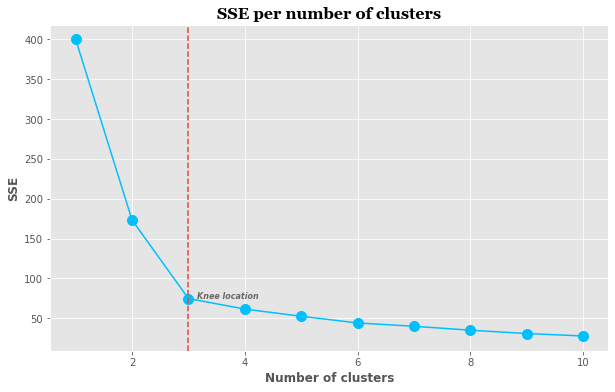

In [116]:
# locating the knee point
kl = KneeLocator(range(1,11),SSE
                 ,curve="convex",
                 direction="decreasing")
k=kl.elbow

# plot
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(np.arange(1,11,1)
         ,SSE
         ,marker='o'
         ,markersize=10
         ,color='deepskyblue'
        )
plt.axvline(x=k, linestyle='--')
plt.text(k+0.15, SSE[2], 'Knee location', rotation= 0, fontsize=8, fontweight='bold', 
         fontstyle='italic', color='dimgray' )
plt.title('SSE per number of clusters', fontsize=16, fontweight='bold', fontname='georgia')
plt.xlabel('Number of clusters', fontsize=12, fontweight='bold')
plt.ylabel('SSE', fontsize=12, fontweight='bold')
plt.show()

#### silhouette coefficient
- Silhouette coefficient measure cluster cohesion and separation. It quantitifies how well a data point fits well into its assigned cluster based on two factors:
    - How close the data point is to ther points in the cluster
    - How far away the point is from points in other clusters
- The silhouette score is an average of the silhouette coefiecients - thus requires atleast two coefficients

In [117]:
silh_coef=[]
for k in range(2,12):
    KM['kmeans'].n_clusters=k
    KM.fit(features)
    features_scaled = KM['Scaler'].transform(features)
    score=silhouette_score(features_scaled,kmeans.labels_)
    silh_coef.append(score)

0.5915043942870359 1


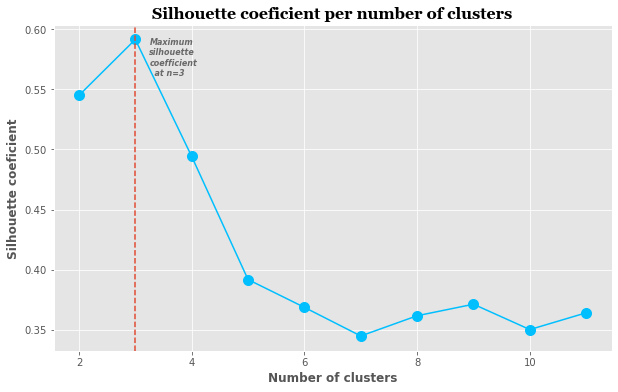

In [118]:
# plot
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(np.arange(2,12)
         ,silh_coef
         ,marker='o'
         ,markersize=10
         ,color='deepskyblue'
        )
# get maximum silhouette coefficient
x, y = plt.gca().lines[0].get_xdata(), plt.gca().lines[0].get_ydata()
maxy, maxindex = max(y), np.argmax(y)
maxx = x[maxindex] 
score = range(2,12)[maxindex]
print(max_, maxindex)
plt.axvline(x=maxx, linestyle='--')
plt.text(maxx+0.25, maxy-0.03, 'Maximum\nsilhouette\ncoefficient\n  at n={}'.format(score), rotation= 0, fontsize=8, fontweight='bold', 
         fontstyle='italic', color='dimgray' )
plt.title('Silhouette coeficient per number of clusters', fontsize=16, fontweight='bold', fontname='georgia')
plt.xlabel('Number of clusters', fontsize=12, fontweight='bold')
plt.ylabel('Silhouette coeficient', fontsize=12, fontweight='bold')
plt.show()

#### Fitting KMeans

In [119]:
KM['kmeans'].n_clusters =3
KM.fit(features)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

#### Assigning clusters

In [120]:
# clusters
cluster_pct=pd.Series(KM['kmeans'].labels_).value_counts(normalize=True)
cluster_pct.sort_values(ascending=False, inplace=True)

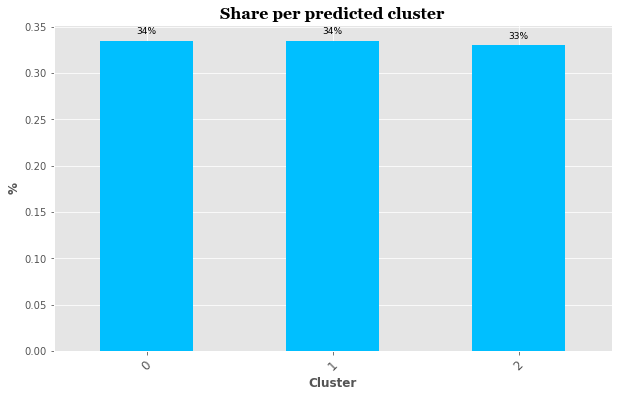

In [121]:
fig, ax = plt.subplots(figsize=(10,6))
axes=cluster_pct.plot(kind='bar', color='deepskyblue')
plt.tick_params(axis='x', which='major', labelsize=12, rotation=45)
plt.title('Share per predicted cluster', fontsize=16, fontweight='bold', fontname='georgia')
plt.xlabel('Cluster', fontsize=12, fontweight='bold')
plt.ylabel('%', fontsize=12, fontweight='bold')
for ax in axes.patches:
    value = '{:.0%}'.format(ax.get_height())
    axes.text(ax.get_x()+(ax.get_width()*0.5)
             ,0.01+ax.get_height()
             ,value
             ,ha='center' 
             ,va='center'
             ,fontsize=9
             #,rotation=90
            )
#insertV_labels(ax)
plt.show()

In [122]:
df = pd.DataFrame(features, columns = ['Feature1', 'Feature2' ])
df['Segments'] = labels
df['Pred_segments'] = KM['kmeans'].labels_

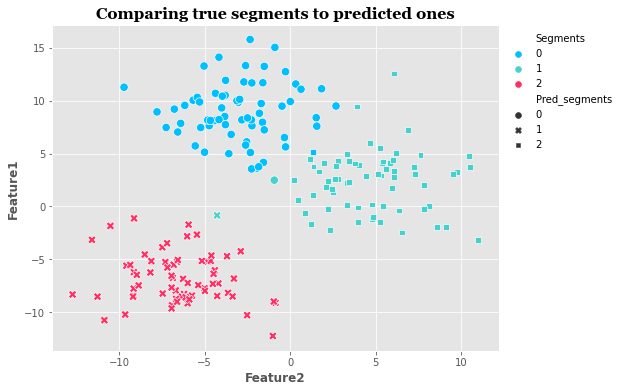

In [123]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Feature1', y='Feature2', data=df, hue='Segments', style='Pred_segments'
                ,palette={0:'deepskyblue', 1:'#48d1cc', 2:'#ff2e63'}
                ,s=70
               )
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, fontsize=10, frameon=False
           ,title_fontsize=12
          )
plt.title('Comparing true segments to predicted ones', fontsize=16, fontweight='bold', fontname='georgia')
plt.ylabel('Feature1',fontweight='bold')
plt.xlabel('Feature2',fontweight='bold')
plt.show()


#### Establishing clustering rules for each feature

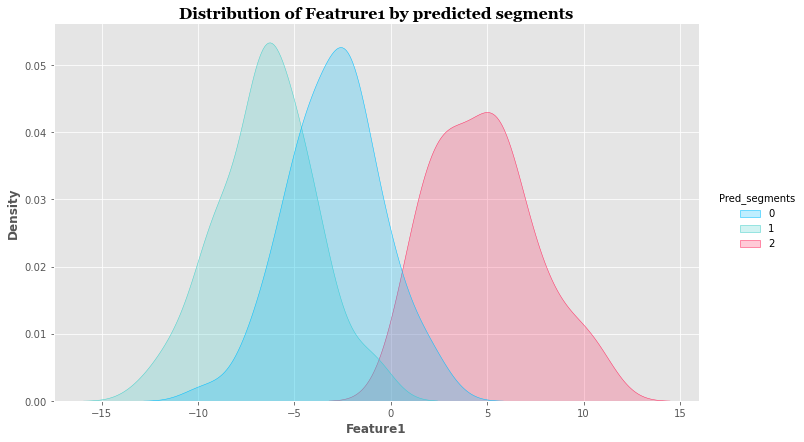

In [124]:

sns.displot(data=df, x='Feature1',hue='Pred_segments'
            ,kind='kde',fill=True
            ,palette={0:'deepskyblue', 1:'#48d1cc', 2:'#ff2e63'}
            ,height=6
            ,aspect=1.67
           )
plt.title('Distribution of Featrure1 by predicted segments', fontsize=16, 
             fontweight='bold', fontname='georgia')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.xlabel('Feature1', fontsize=12, fontweight='bold')
plt.show()

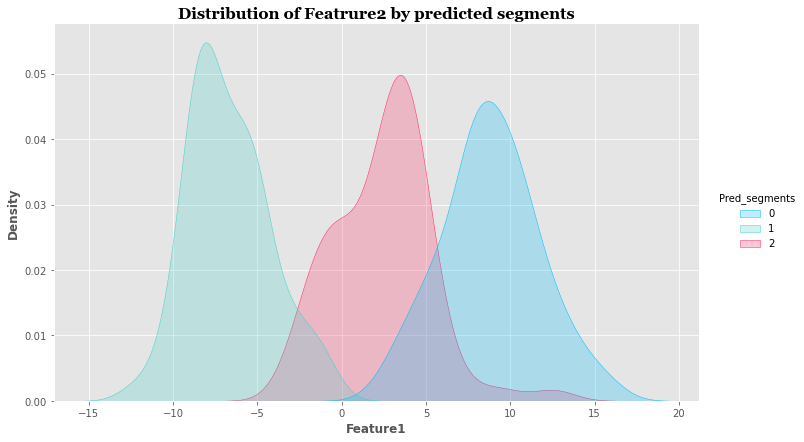

In [125]:

sns.displot(data=df, x='Feature2',hue='Pred_segments'
            ,kind='kde',fill=True
            ,palette={0:'deepskyblue', 1:'#48d1cc', 2:'#ff2e63'}
            ,height=6
            ,aspect=1.67
           )
plt.title('Distribution of Featrure2 by predicted segments', fontsize=16, 
             fontweight='bold', fontname='georgia')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.xlabel('Feature1', fontsize=12, fontweight='bold')
plt.show()